<a href="https://colab.research.google.com/github/Rizzyad/PredictDiabetes-Classifier/blob/main/Cls_DiabetesPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
.import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.duplicated().sum()

3854

In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df_num = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_num['gender'] = le.fit_transform(df_num['gender'])
df_num['smoking_history'] = le.fit_transform(df_num['smoking_history'])

df_num.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

0    91500
1     8500
Name: diabetes, dtype: int64

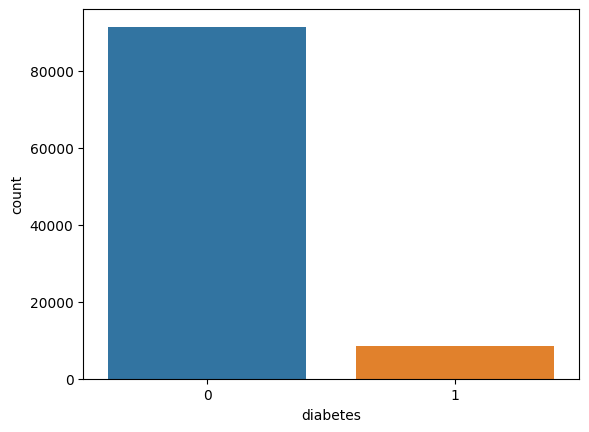

In [ ]:
sns.countplot(data=df_num, x='diabetes')
df_num['diabetes'].value_counts()

In [ ]:
df1 = df_num.copy()

In [ ]:
from sklearn.utils import resample

  df_majority = df_num[(df_num['diabetes']==0)]
  df_minority = df_num[(df_num['diabetes']==1)]

  df_minority_upsampled = resample(df_minority,replace=True, n_samples=91500, random_state=0)

  df_upsampled = pd.concat([df_majority, df_minority_upsampled])

0    91500
1    91500
Name: diabetes, dtype: int64

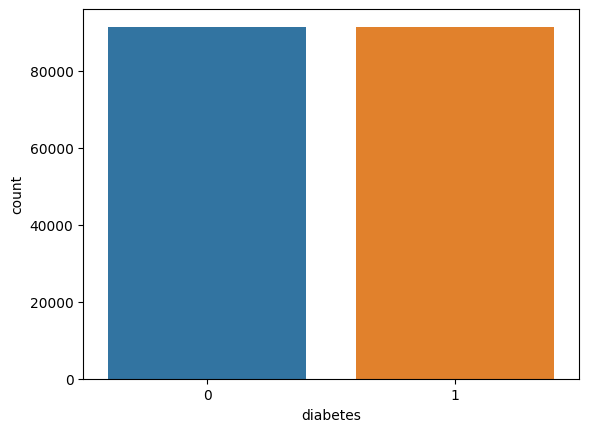

In [ ]:
sns.countplot(data=df_upsampled, x='diabetes')
df_upsampled['diabetes'].value_counts()

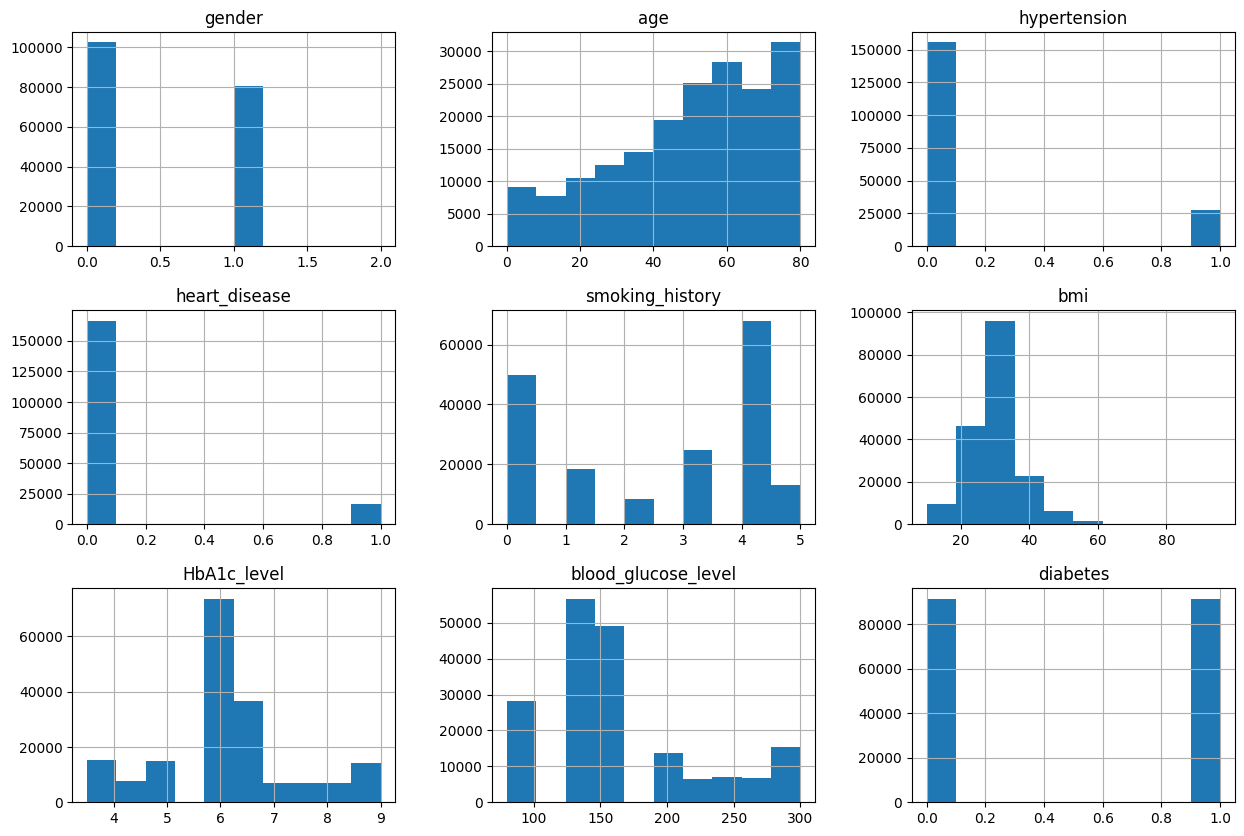

In [ ]:
ax = df_upsampled.hist(figsize=(15,10))

<Axes: >

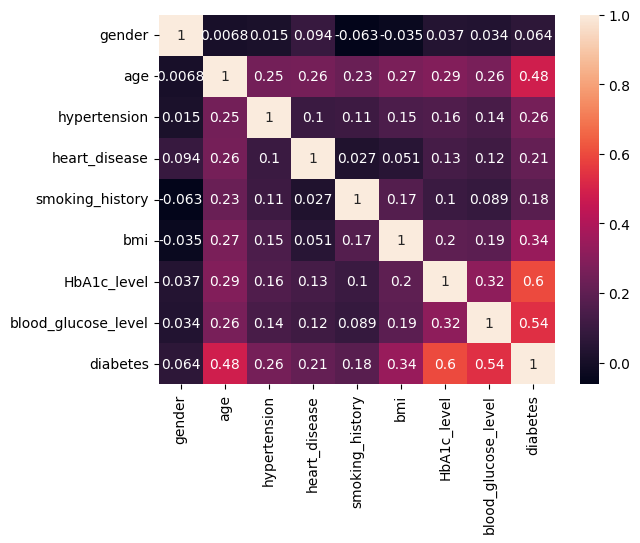

In [ ]:
sns.heatmap(df_upsampled.corr(), annot=True)

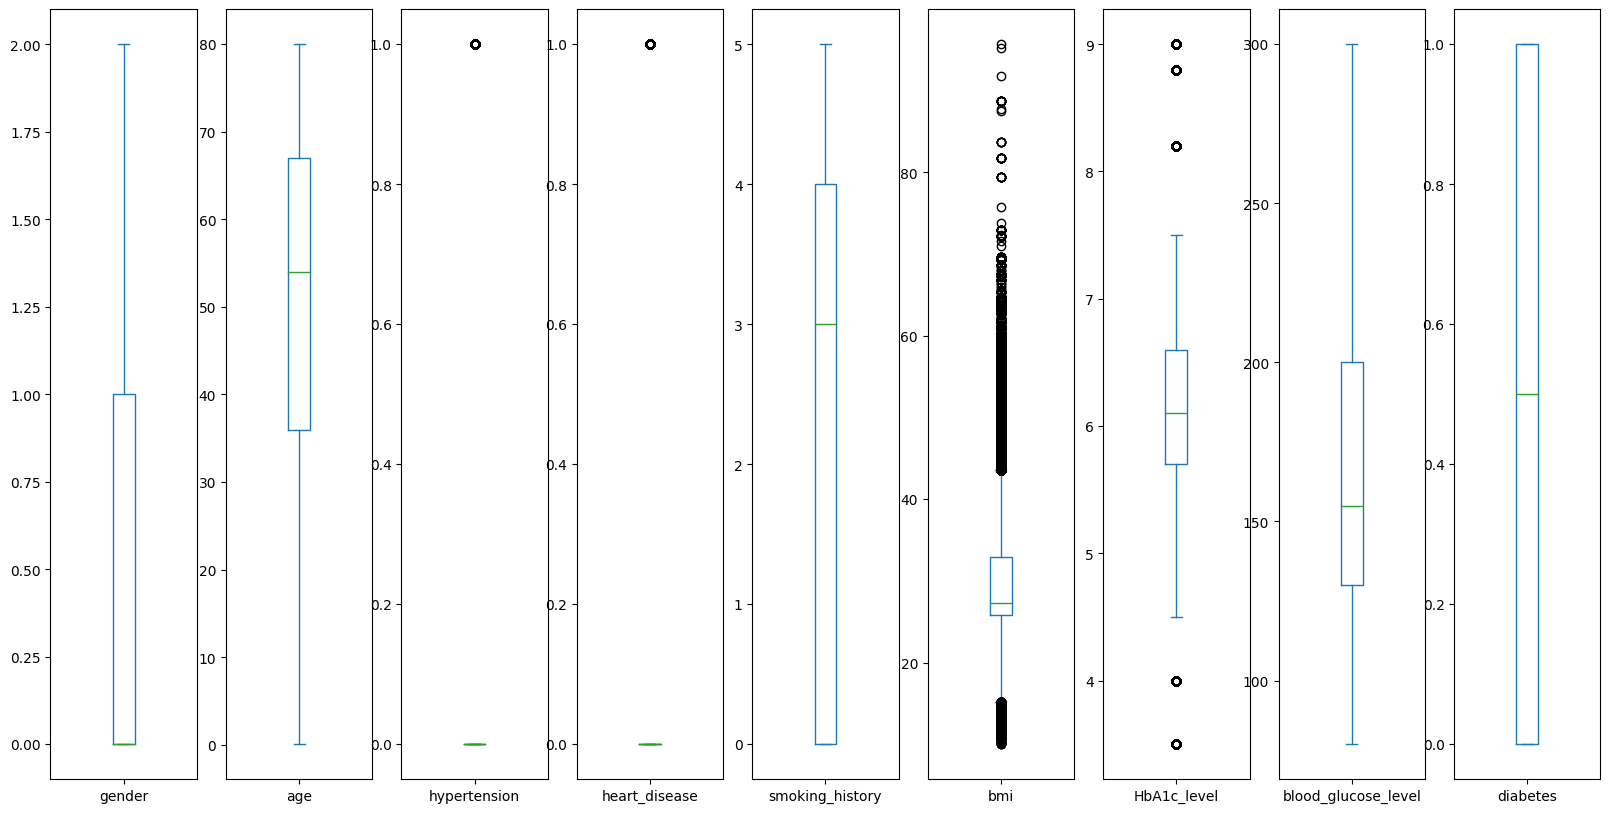

In [ ]:
ax = df_upsampled.plot(kind='box', subplots=True, figsize=(20,10))

In [ ]:
df_upsampled.shape

(183000, 9)

In [ ]:
import scipy.stats as stats

z = np.abs(stats.zscore(df_upsampled))
df_clean = df_upsampled[ (z<3).all (axis=1) ]

In [ ]:
df_clean.shape

(164485, 9)

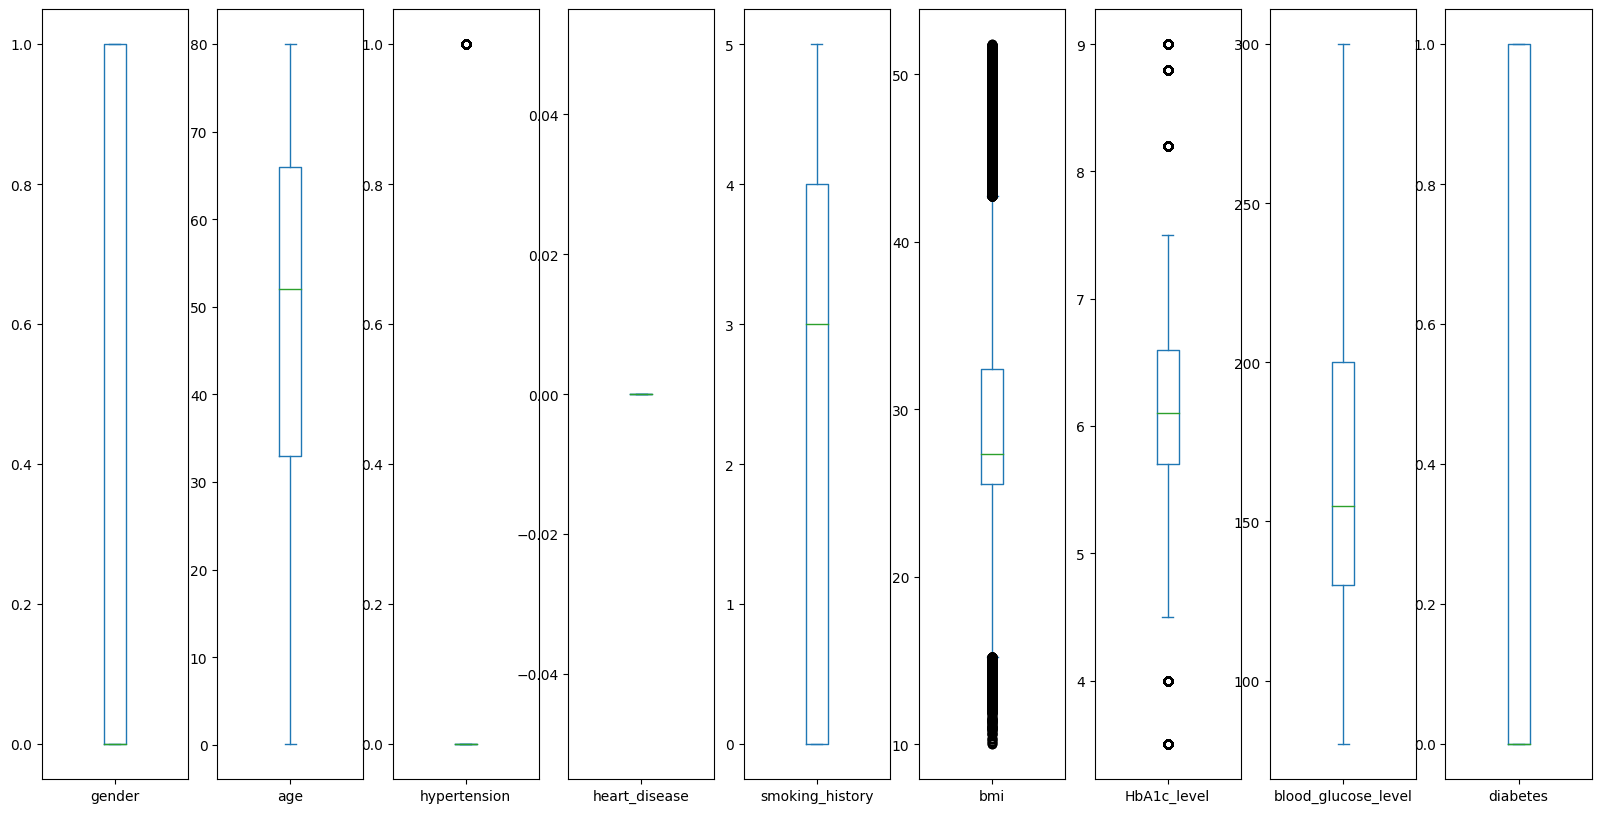

In [ ]:
ax = df_clean.plot(kind='box', subplots=True, figsize=(20,10))

0    88423
1    76062
Name: diabetes, dtype: int64

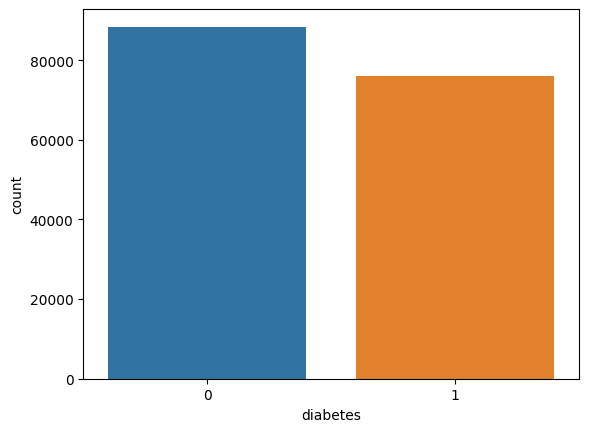

In [ ]:
sns.countplot(data = df_clean, x ='diabetes')
df_clean['diabetes'].value_counts()

<Axes: >

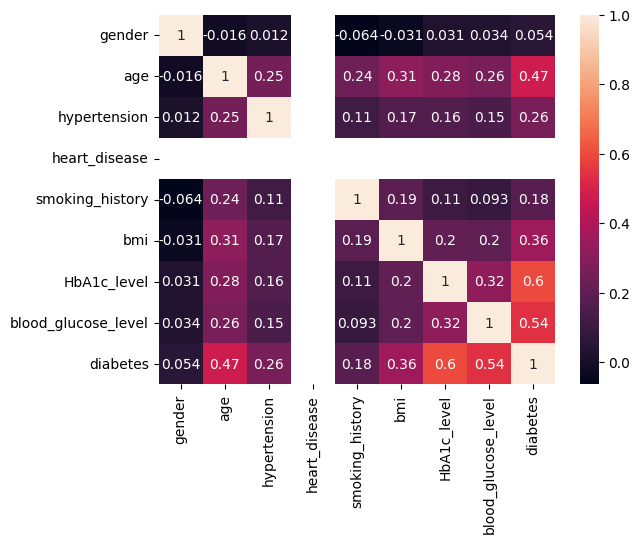

In [ ]:
sns.heatmap(df_clean.corr(), annot=True)

In [ ]:
df_clean.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

<Axes: >

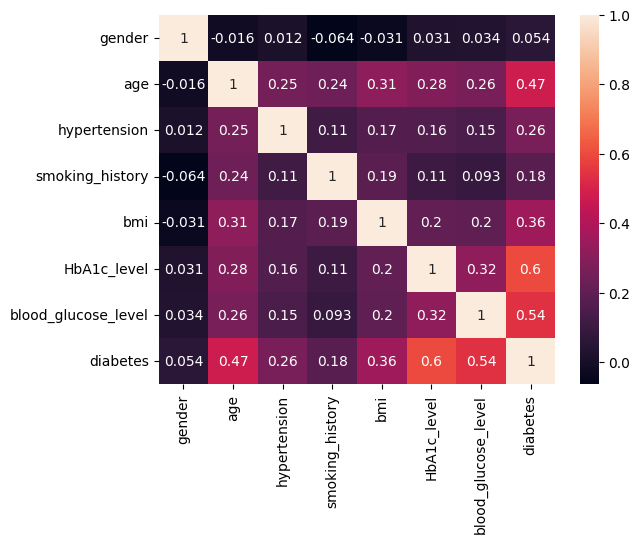

In [ ]:
df_clean = df_clean.drop('heart_disease', axis=1)
sns.heatmap(df_clean.corr(), annot=True)

In [ ]:
X = df_clean.drop('diabetes', axis=1)
y = df_clean['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
cls = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),
    SVC(probability=True),
    XGBClassifier(),
]

acc_dict = {}

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns = log_cols)

for clf in cls :
  name = clf.__class__.__name__
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  acc = accuracy_score(y_test,y_pred)
  acc_dict[name] = acc

for clf in acc_dict :
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

<ipython-input-36-fb59123fdf73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-36-fb59123fdf73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-36-fb59123fdf73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-36-fb59123fdf73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-36-fb59123fdf73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipyt

<Axes: xlabel='Accuracy', ylabel='Classifier'>

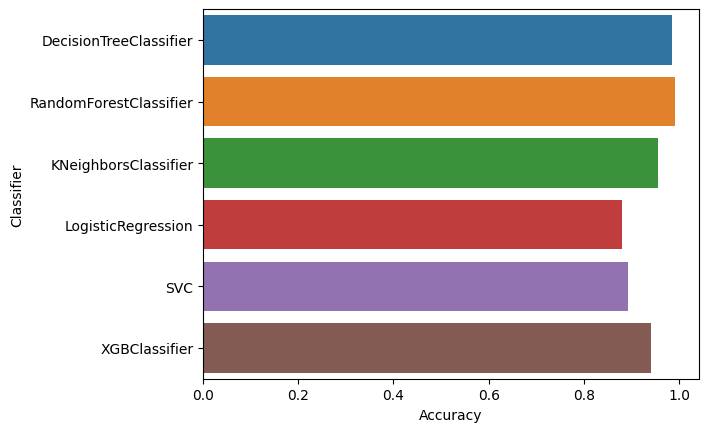

In [ ]:
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

sns.barplot(data = log, x='Accuracy', y='Classifier')

In [ ]:
log.sort_values(by=['Accuracy'], ascending=False)

,Classifier,Accuracy
0,RandomForestClassifier,0.992401
0,DecisionTreeClassifier,0.985470
0,KNeighborsClassifier,0.955497
0,XGBClassifier,0.940633
0,SVC,0.893759
0,LogisticRegression,0.880840


In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_train)
y_pred = rf.predict(X_test)

print(accuracy_score(y_train,y_pred2))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.999194455421467
0.9929476851992582
[[17370   230]
 [    2 15295]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17600
           1       0.99      1.00      0.99     15297

    accuracy                           0.99     32897
   macro avg       0.99      0.99      0.99     32897
weighted avg       0.99      0.99      0.99     32897



In [ ]:
def clf_model(model):
  scores = cross_val_score(model,X,y, cv=10)

  print(scores)
  print(scores.mean())

In [ ]:
clf_model(RandomForestClassifier())

[0.99297808 0.99218774 0.99313007 0.99218774 0.99233973]
0.9925646715505974


In [ ]:
clf_model(RandomForestClassifier())

[0.99355584 0.99501489 0.99306949 0.99440695 0.99422457 0.99452821
 0.99325146 0.99355545 0.99379864 0.99343385]
0.9938839356046385
